# About the notebook

In [27]:
library(tidyverse)
library(healthyFlowData)
library(flowMatch)
library(flowMeans)

# Import data

In [7]:
data(x)

class(x)
dim(x)
head(x)

[1] "data.frame"

[1] 17640     6

FSC.H,SSC.H,FL1.H,FL2.H,FL3.H,FL4.H
606,315,241.2067,554.7057,362.45828,80.35650
766,285,285.1914,577.0054,0.00000,169.98489
723,489,681.0541,586.7616,873.25854,275.06647
554,315,177.3578,543.5558,250.50204,233.85800
572,292,332.0139,544.9496,30.78796,222.52568
550,269,566.1262,478.0504,582.17236,24.72507


# use flowMeans

flowMeans {flowMeans}
```
Finds a good fit to the data using k-means clustering algorithm. Then merges the adjacent dense
spherical clusters to find non-spherical clusters.

MaxN: Maximum number of clusters. If set to NA (default) the value will be estimated
automatically
```

In [44]:
res = flowMeans(x, varNames=c("FL1.H", "FL2.H", "FL3.H", "FL4.H"), MaxN=10)
res

Object of class 'flowMeans' 
This object has the following slots: 
Label, Labels, MinIndex, MaxN, Mats, Mins, Line1, Line2

look what I got from flowMeans

In [45]:
class(res@Labels)
length(res@Labels)

[1] "list"

[1] 10

get the result label

In [46]:
res@Labels[[1]] %>% unique %>% length
res@Labels %>% lapply(., unique)

[1] 10

[[1]]
 [1]  3  6  5  4  8  2  9  1  7 10

[[2]]
[1] 3 6 5 4 8 2 9 1 7

[[3]]
[1] 3 5 4 8 2 6 1 7

[[4]]
[1] 3 5 4 2 6 1 7

[[5]]
[1] 3 5 4 2 6 1

[[6]]
[1] 3 5 2 4 1

[[7]]
[1] 2 3 4 1

[[8]]
[1] 2 3 1

[[9]]
[1] 1 2

[[10]]
[1] 1

plot the first example

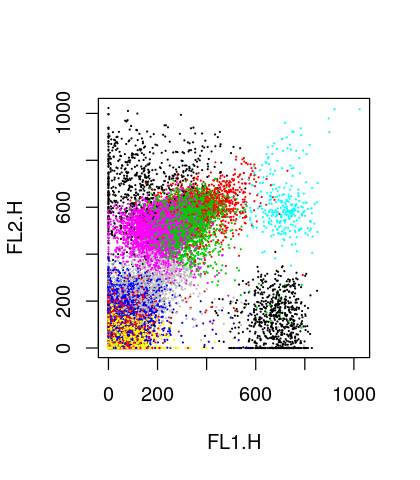

In [47]:
options(repr.plot.width = 3.5, repr.plot.height = 4)
plot(x[,c(3,4)], col=res@Labels[[1]], pch=20, cex = 0.1);

The Mins vector contains the minimum distances between the merged clusters
at each iteration:

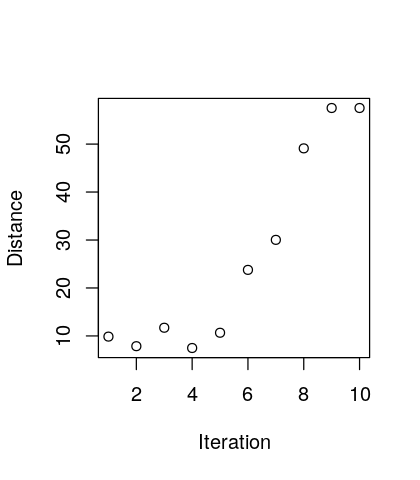

In [48]:
plot(res@Mins, xlab='Iteration', ylab='Distance')

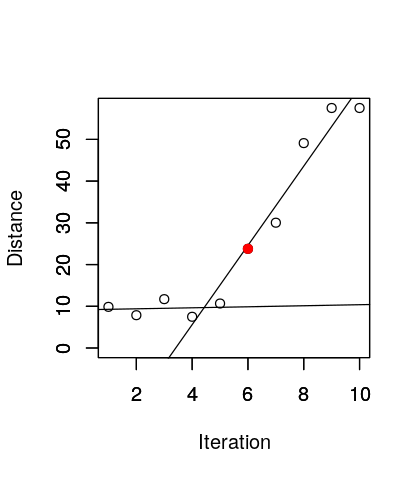

In [49]:
plot(res@Mins, xlab=' ', ylab=' ', xlim=c(1, res@MaxN), ylim=c(0, max(res@Mins)))

ft <- changepointDetection(res@Mins)
abline(ft$l1)
abline(ft$l2);

par(new=TRUE)
plot(ft$MinIndex + 1, res@Mins[ft$MinIndex + 1], 
     pch=19, col='red', xlab='Iteration', ylab='Distance', 
     xlim=c(1, res@MaxN), ylim=c(0, max(res@Mins)));

best k to choose

In [51]:
ft$MinIndex + 1

[1] 6

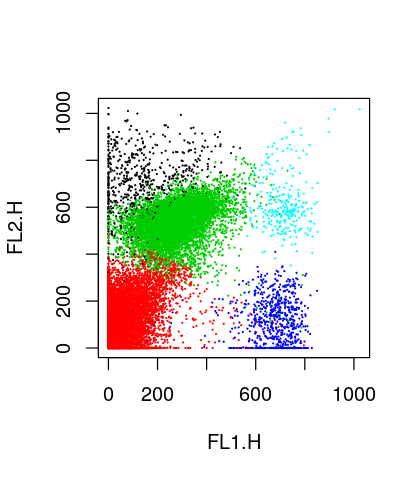

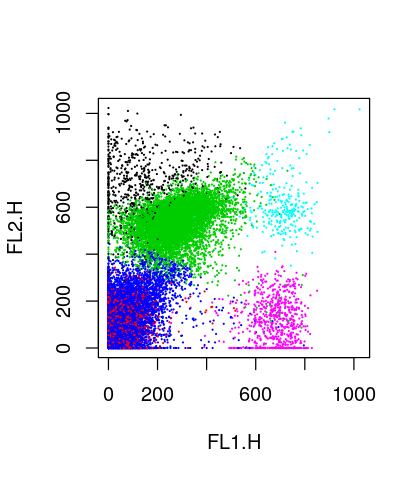

In [55]:
options(repr.plot.width = 3.5, repr.plot.height = 4)
### option 1
plot(x[,c(3,4)], col=res@Labels[[ft$MinIndex + 1]], pch=20, cex = 0.1);
### option 2
plot(x, res, c("FL1.H", "FL2.H"), pch=20, cex = 0.1)

try different MaxN

In [56]:
lst_res = lapply(c(10, 15, 20), function(k){
    flowMeans(x, varNames=c("FL1.H", "FL2.H", "FL3.H", "FL4.H"), MaxN=k)
})

Notice the results are different for different maxN

In [57]:
lapply(lst_res, function(res){
    ft <- changepointDetection(res@Mins)
    return(ft$MinIndex + 1)
})

[[1]]
[1] 6

[[2]]
[1] 9

[[3]]
[1] 16